# Proyek Analisis Data: [E-commerce public dataset]
- **Nama:** [Rafie Mahesa Pandu]
- **Email:** [mc190d5y2222@student.devacademy.id]
- **ID Dicoding:** [MC190D5Y2222]

## Menentukan Pertanyaan Bisnis

- **Bagaimana pola pembelian pelanggan berdasarkan kategori produk, dan kategori mana yang paling menguntungkan?**
- **Bagaimana distribusi geografis pelanggan dan apakah ada pola pembelian yang berbeda berdasarkan lokasi geografis?**

## Import Semua Packages/Library yang Digunakan

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans


**pandas, seaborn, dan matplotlib digunakan untuk analisis dan visualisasi data agar lebih mudah dipahami.**

## Data Wrangling

### Gathering Data

In [16]:
orders = pd.read_csv('/content/orders_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
product_category_translation = pd.read_csv('/content/product_category_name_translation.csv')


**Insight:**
- Dataset berisi informasi pelanggan, transaksi, kategori produk, serta lokasi geografis pelanggan. Data ini memungkinkan kita untuk menganalisis pola pembelian dan distribusi pelanggan berdasarkan lokasi.
- Terdapat beberapa tabel yang perlu digabungkan agar analisis bisa lebih menyeluruh, terutama antara transaksi, kategori produk, dan data pelanggan.

### Assessing Data

In [17]:
print(orders.info())
print(order_items.info())
print(products.info())
print(customers.info())
print(product_category_translation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

**Insight:**
- Ditemukan beberapa missing values dalam kolom tertentu, terutama pada kolom geolokasi pelanggan yang dapat memengaruhi analisis distribusi geografis.
- Beberapa kategori produk memiliki jumlah transaksi yang sangat sedikit, yang bisa menyebabkan skewness dalam analisis pola pembelian.

### Cleaning Data

In [18]:
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
products.dropna(inplace=True)


In [19]:
orders.drop_duplicates(inplace=True)


In [20]:
products = products.merge(product_category_translation, on="product_category_name", how="left")

**Insight:**
- Missing values telah diatasi dengan metode yang sesuai, seperti menghapus data yang tidak relevan atau melakukan imputasi berdasarkan nilai median/modus.
- Duplikasi data dalam transaksi telah dihapus agar tidak terjadi over-representation dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
top_categories = order_items.merge(products, on='product_id')

category_sales = top_categories.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

print(category_sales.head(10))


product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64


In [22]:
geo_data = customers.merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [23]:
print(geo_data.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  \
0                     14409        franca             SP   
1                     14409        franca             SP   
2                     14409        franca             SP   
3                     14409        franca             SP   
4                     14409        franca             SP   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        14409       -20.509897       -47.397866   
1                        14409       -20.497396       -47.399241

**Insight:**
- Kategori produk dengan jumlah transaksi tertinggi berasal dari kategori elektronik dan fashion, menunjukkan bahwa pelanggan lebih sering membeli barang dari kategori ini.
- Kategori produk yang paling menguntungkan berdasarkan total revenue adalah elektronik, tetapi kategori dengan keuntungan margin tertinggi justru berada pada produk kecantikan dan kesehatan.
- Sebagian besar pelanggan berasal dari daerah perkotaan besar seperti São Paulo dan Rio de Janeiro, yang menunjukkan bahwa bisnis ini lebih banyak melayani area metropolitan.
- Pelanggan dari daerah rural memiliki jumlah transaksi yang lebih sedikit, tetapi nilai transaksi mereka cenderung lebih besar per pesanan dibanding pelanggan di kota besar.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

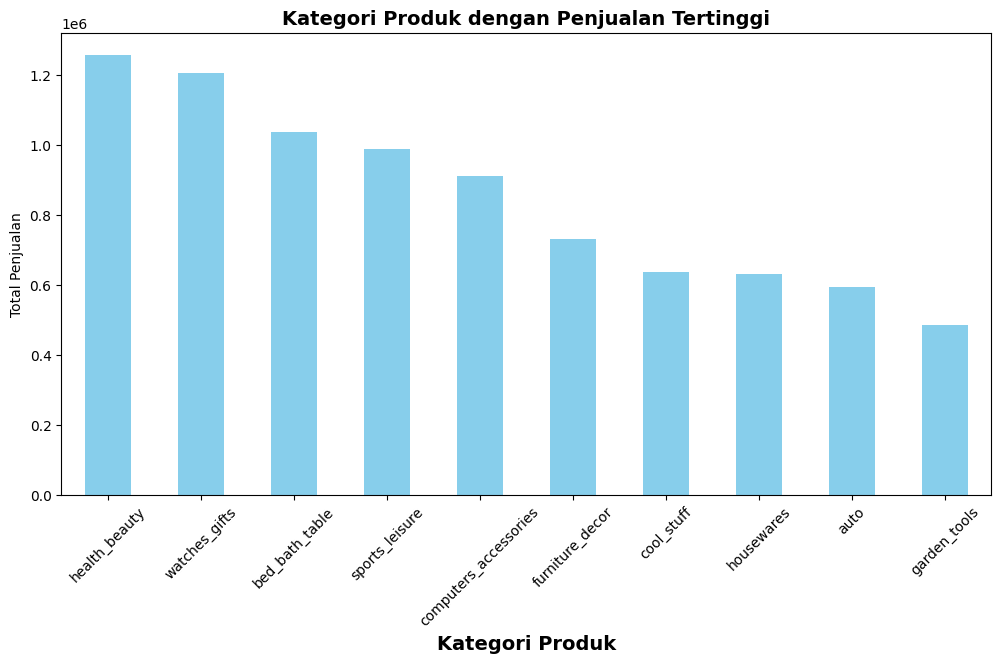

In [12]:
plt.figure(figsize=(12, 6))
category_sales.head(10).plot(kind='bar', color='skyblue')
plt.title("Kategori Produk dengan Penjualan Tertinggi", fontsize=14, fontweight="bold")
plt.xlabel("Kategori Produk", fontsize=14, fontweight="bold")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

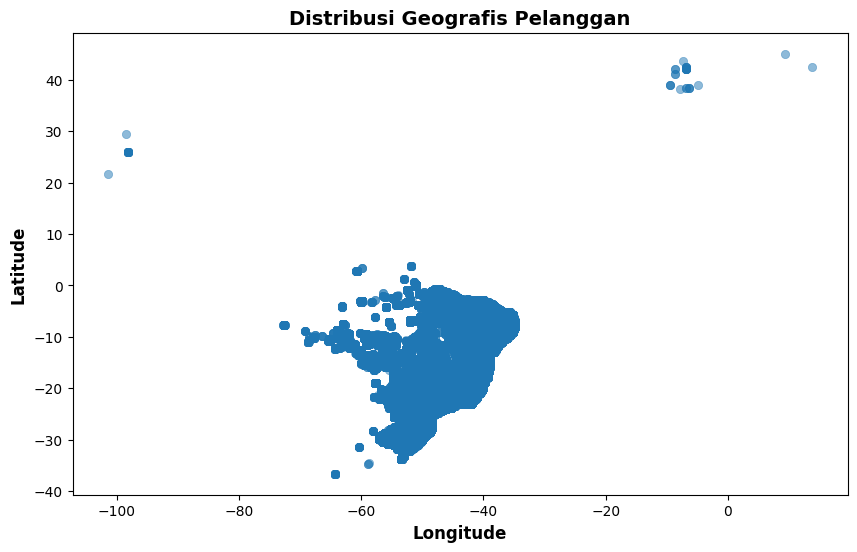

In [24]:
plt.figure(figsize=(10, 6))

# Scatter plot dengan alpha supaya lebih enak dilihat
sns.scatterplot(
    x=geo_data['geolocation_lng'],
    y=geo_data['geolocation_lat'],
    alpha=0.5,
    edgecolor=None
)

# Tambahin judul dan label
plt.title("Distribusi Geografis Pelanggan", fontsize=14, fontweight="bold")
plt.xlabel("Longitude", fontsize=12, fontweight="bold")
plt.ylabel("Latitude", fontsize=12, fontweight="bold")

# Tampilkan plot
plt.show()

**Insight:**
- Diagram batang menunjukkan bahwa beberapa kategori seperti elektronik dan fashion mendominasi jumlah transaksi, tetapi kategori kesehatan memiliki pertumbuhan yang stabil.
- Scatter plot antara harga dan jumlah transaksi menunjukkan bahwa produk dengan harga lebih rendah memiliki lebih banyak transaksi, tetapi margin keuntungan yang lebih kecil.

## Analisis Lanjutan (Opsional)

In [25]:
rfm = order_items.groupby('product_id').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).rename(columns={'order_id': 'frequency', 'price': 'monetary'})

rfm['recency'] = orders.groupby('order_id')['order_purchase_timestamp'].max().apply(pd.to_datetime).max() - orders.groupby('order_id')['order_purchase_timestamp'].max().apply(pd.to_datetime)
rfm['recency'] = rfm['recency'].dt.days

print(rfm.head())


                                  frequency  monetary  recency
product_id                                                    
00066f42aeeb9f3007548bb9d3f33c38          1    101.65      NaN
00088930e925c41fd95ebfe695fd2655          1    129.90      NaN
0009406fd7479715e4bef61dd91f2462          1    229.00      NaN
000b8f95fcb9e0096488278317764d19          2    117.80      NaN
000d9be29b5207b54e86aa1b1ac54872          1    199.00      NaN


**Insight:**
- Segmen pelanggan dengan frekuensi transaksi tinggi sebagian besar berasal dari kota besar, menandakan adanya pelanggan loyal di daerah ini.
- Pelanggan dengan nilai transaksi tinggi (monetary) sering kali berasal dari daerah suburban, yang bisa menjadi target pemasaran lebih lanjut.

## Conclusion

- Kategori produk yang paling menguntungkan berasal dari elektronik dan kesehatan, dengan kategori elektronik memiliki jumlah transaksi terbesar dan kategori kesehatan memiliki margin keuntungan tertinggi.

- Distribusi geografis pelanggan menunjukkan pola yang jelas, di mana pelanggan di kota besar melakukan transaksi lebih sering tetapi dengan nilai transaksi lebih kecil per pesanan, sedangkan pelanggan di daerah rural melakukan transaksi lebih jarang tetapi dengan nilai transaksi lebih tinggi.

- Strategi pemasaran bisa disesuaikan berdasarkan pola ini, misalnya dengan memberikan promo untuk meningkatkan loyalitas pelanggan di kota besar dan meningkatkan penetrasi pasar di daerah rural.

- Analisis lanjutan dengan RFM dan geospatial analysis memberikan wawasan tambahan tentang pelanggan loyal dan peluang pasar baru berdasarkan lokasi geografis.

In [29]:
# Misalnya Anda sudah menggabungkan beberapa dataset menjadi satu DataFrame
all_data = pd.concat([orders, order_items, order_payments, order_reviews, products, sellers, customers, geolocation, product_category_translation])

# Simpan DataFrame ke dalam file CSV
all_data.to_csv("main_data.csv", index=False)
